In [1]:
import codecs
import utility_functions_v2 as util
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import siamese_models 
import load_buffalo_data as load_data
import os
from tensorflow.keras.models import Sequential,Model, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout,LSTM,TimeDistributed,GRU  
from tensorflow.keras.layers import Bidirectional,BatchNormalization,Activation,Concatenate, Multiply, Subtract, Lambda
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras import backend as K
from sklearn.metrics import roc_auc_score

In [2]:
import importlib
importlib.reload(load_data)
importlib.reload(siamese_models)
importlib.reload(util)

<module 'utility_functions_v2' from 'C:\\Users\\nyein\\Intership_proj\\keystroke_dynamics\\initial_testing_phase\\utility_functions_v2.py'>

## Declare training constants

In [3]:
#best hyper-parameters currently
seq_length = 30
weight_decay = 1e-6
batch_size = 64
epochs = 100
threshold = 0.5
num_cnn = 16
num_lstm = 30
optimiser = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0001)
#loss_func = ["binary_crossentropy",siamese_models.custom_loss]
loss_func = ["binary_crossentropy",tfa.losses.contrastive_loss]
early_stopping,learning_rate_reduction = siamese_models.get_call_backs_2()

## Load data

In [4]:
(left_data_train, right_data_train, train_label), (left_data_val, right_data_val, val_label), scaler ,(base_user_data_1,base_user_data_2) = load_data.load_siamese_data("005","080",seq_length)
(left_data_test, right_data_test, test_label), (user_test_sample, intruder_test_sample) = load_data.load_siamese_test_data("005","080",scaler,seq_length,base_user_data_1,base_user_data_2)

print("left train data shape: {}, right train data shape: {}, train label shape: {}".format(left_data_train.shape,right_data_train.shape,train_label.shape))
print("left val data shape: {}, right val data shape: {}, val label shape: {}".format(left_data_val.shape,right_data_val.shape,val_label.shape))
print("left test data shape: {}, right test data shape: {}, test label shape: {}".format(left_data_test.shape,right_data_test.shape,test_label.shape))

not found!! popping from list
not found!! popping from list
not found!! popping from list
not found!! popping from list
not shuffled !!!
not shuffled !!!
comparing first 500 vs first 500 (no random sampled)!!!
left train data shape: (14000, 30, 4, 1), right train data shape: (14000, 30, 4, 1), train label shape: (14000, 1)
left val data shape: (5600, 30, 4, 1), right val data shape: (5600, 30, 4, 1), val label shape: (5600, 1)
left test data shape: (2000, 30, 4, 1), right test data shape: (2000, 30, 4, 1), test label shape: (2000, 1)


## 1. Training

Using cosine dist configuration 3 - 16 CNN filters, 30 LSTM !!!!
loss function used: binary_crossentropy
Epoch 1/100
219/219 [==============================] - 7s 32ms/step - loss: 0.6604 - acc: 0.5669 - auroc: 0.5742 - val_loss: 1.5460 - val_acc: 0.5677 - val_auroc: 0.7520
Epoch 2/100
219/219 [==============================] - 5s 25ms/step - loss: 0.6172 - acc: 0.6033 - auroc: 0.6660 - val_loss: 0.5421 - val_acc: 0.6036 - val_auroc: 0.6996
Epoch 3/100
219/219 [==============================] - 5s 25ms/step - loss: 0.4553 - acc: 0.7761 - auroc: 0.8642 - val_loss: 0.4424 - val_acc: 0.7195 - val_auroc: 0.9219
Epoch 4/100
219/219 [==============================] - 7s 32ms/step - loss: 0.2225 - acc: 0.9143 - auroc: 0.9761 - val_loss: 0.4071 - val_acc: 0.7398 - val_auroc: 0.9850
Epoch 5/100
219/219 [==============================] - 7s 32ms/step - loss: 0.1255 - acc: 0.9545 - auroc: 0.9932 - val_loss: 0.3575 - val_acc: 0.7232 - val_auroc: 0.9990
Epoch 6/100
219/219 [========================

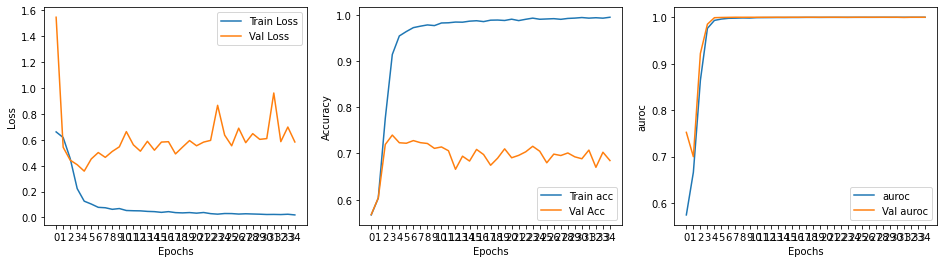

In [5]:
cos_dist_ver3_model = siamese_models.build_cnn_lstm_siamese_model_cos_dist_ver_3((seq_length,4,1),0.3,num_cnn,num_lstm)
cos_dist_ver3_history = siamese_models.train_siamese_model(cos_dist_ver3_model, optimiser, loss_func[0], [early_stopping], ['acc',siamese_models.auroc],
                                                           left_data_train, right_data_train, train_label,
                                                           left_data_val, right_data_val, val_label, epochs, batch_size)

## 2. Testing

### 2.1 Testing cosine dist 

In [6]:
#testing configuration 3
cos_dist_ver3_scores = siamese_models.print_model_scores([cos_dist_ver3_model],test_label,left_data_test,right_data_test,0.5)

TN:    985,    FP:   15,   FN:   784,   TP:   216
FAR:   0.015,   FRR:   0.784,   EER:   0.4431882419446015

